# Homework with McDonald's sentiment data

## Imaginary problem statement

McDonald's receives **thousands of customer comments** on their website per day, and many of them are negative. Their corporate employees don't have time to read every single comment, but they do want to read a subset of comments that they are most interested in. In particular, the media has recently portrayed their employees as being rude, and so they want to review any comments about **rude service** so that they can update their employee training accordingly.

McDonald's has hired you to develop a system that ranks each comment by the **likelihood that it is referring to rude service**. They will use your system to build a "rudeness dashboard" for their corporate employees, so that employees can spend a few minutes each day examining the **most relevant recent comments**.

## Description of the data

Before hiring you, McDonald's used the [CrowdFlower platform](http://www.crowdflower.com/data-for-everyone) to pay humans to **hand-annotate** about 1500 comments with the **type of complaint**. The complaint types are listed below, with the encoding used in the data listed in parentheses:

- Bad Food (BadFood)
- Bad Neighborhood (ScaryMcDs)
- Cost (Cost)
- Dirty Location (Filthy)
- Missing Item (MissingFood)
- Problem with Order (OrderProblem)
- Rude Service (RudeService)
- Slow Service (SlowService)
- None of the above (na)

## Task 1

Read **`mcdonalds.csv`** into a pandas DataFrame and examine it. (It can be found in the **`data`** directory of the course repository.)

- The **policies_violated** column lists the type of complaint. If there is more than one type, the types are separated by newline characters.
- The **policies_violated:confidence** column lists CrowdFlower's confidence in the judgments of its human annotators for that row (higher is better).
- The **city** column is the McDonald's location.
- The **review** column is the actual text comment.

In [6]:
import os
os.getcwd()
os.chdir('../data')

In [7]:
# Create reviews DF variable using the pandas module
import pandas as pd
import numpy as np
#reviews = pd.read_csv('https://raw.githubusercontent.com/dataschool/MLtext2/master/data/mcdonalds.csv?token=AEv2W3S4vnWOwd7_SPsDLm0vPldKtzwbks5XJpuIwA%3D%3D')
reviews = pd.read_csv('mcdonalds.csv')

In [8]:
# Examine the shape and the first few rows
print reviews.shape
reviews.head(3)

(1525, 11)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN


In [9]:
# examine the last few rows
reviews.tail(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
1522,679500608,False,finalized,3,2/21/15 0:24,ScaryMcDs,0.6458,New York,NaN,"When I am really craving for McDonald's, this ...",NaN
1523,679501257,False,finalized,3,2/21/15 0:32,ScaryMcDs,0.6407,Chicago,NaN,Two points right out of the gate: 1. Thuggery ...,NaN
1524,679501402,False,finalized,3,2/21/15 0:27,ScaryMcDs\nSlowService,1.0\n0.6667,Los Angeles,NaN,I wanted to grab breakfast one morning before ...,NaN


In [10]:
# Examine the DF
reviews.describe()

,_unit_id,_trusted_judgments,policies_violated_gold,Unnamed: 10
count,1.525000e+03,1525.0,0.0,0.0
mean,6.794570e+08,3.0,NaN,NaN
std,4.492182e+03,0.0,NaN,NaN
min,6.794557e+08,3.0,NaN,NaN
25%,6.794560e+08,3.0,NaN,NaN
50%,6.794564e+08,3.0,NaN,NaN
75%,6.794568e+08,3.0,NaN,NaN
max,6.795014e+08,3.0,NaN,NaN


In [11]:
# review details about the features
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
_unit_id                        1525 non-null int64
_golden                         1525 non-null bool
_unit_state                     1525 non-null object
_trusted_judgments              1525 non-null int64
_last_judgment_at               1525 non-null object
policies_violated               1471 non-null object
policies_violated:confidence    1471 non-null object
city                            1438 non-null object
policies_violated_gold          0 non-null float64
review                          1525 non-null object
Unnamed: 10                     0 non-null float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 120.7+ KB


In [12]:
# look at the shape of class values and the first few class labels
print reviews.policies_violated.value_counts().shape
reviews.policies_violated.value_counts().head()

(146,)


na              295
RudeService     177
SlowService     127
OrderProblem    116
BadFood         101
Name: policies_violated, dtype: int64

## Task 2

Remove any rows from the DataFrame in which the **policies_violated** column has a **null value**. Check the shape of the DataFrame before and after to confirm that you only removed about 50 rows.

- **Note:** Null values are also known as "missing values", and are encoded in pandas with the special value "NaN". This is distinct from the "na" encoding used by CrowdFlower to denote "None of the above". Rows that contain "na" should **not** be removed.
- **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_missing_data.html) shows different ways for handling missing data in pandas, and includes one strategy that will work for this task.

In [13]:
bad_rows = reviews.policies_violated.isnull()
sum(bad_rows)

54

In [14]:
good_rows = [not row for row in bad_rows]

In [15]:
sum(good_rows)

1471

In [16]:
reviews = reviews[good_rows]

In [17]:
# verify that the number of observations here mathces the number of non-null entries in the reviews.describe line above
reviews.shape

(1471, 11)

## Task 3

Add a new column to the DataFrame called **"rude"** that is 1 if the **policies_violated** column contains the text "RudeService", and 0 if the **policies_violated** column does not contain "RudeService". The "rude" column is going to be your response variable, so check how many zeros and ones it contains.

- **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_string_munging.html) shows how to use a pandas string method to search for the presence of a sub-string. You will also have to figure out how to convert the boolean results (True/False) to integers (1/0).

In [18]:
# add the new column and set the default value to Infinite as a double check
# check the shape of the DF to make sure changes took effect as expected
# inspect the first few rows to ensure worked as expected
reviews['rude'] = 'inf'
print reviews.shape
print reviews.rude.head()

(1471, 12)
0    inf
1    inf
2    inf
3    inf
4    inf
Name: rude, dtype: object


In [19]:
# review the contents of the policies_violated column to verify what is being looked for
reviews.policies_violated.head()

0    RudeService\nOrderProblem\nFilthy
1                          RudeService
2            SlowService\nOrderProblem
3                                   na
4                          RudeService
Name: policies_violated, dtype: object

In [20]:
# ID boolean list of policies_violated features that contain the target word "RudeService"
# Print the first few rows in the series to make sure worked as expected by comparin with cell above
rude_labels = reviews['policies_violated'].str.contains('RudeService')
print "    Head    "
print rude_labels.head()
print "    Tail    "
print rude_labels.tail()
# Check the number of rows that do in fact contain "RudeService"
print sum(rude_labels)

    Head    
0     True
1     True
2    False
3    False
4     True
Name: policies_violated, dtype: bool
    Tail    
1520    False
1521    False
1522    False
1523    False
1524    False
Name: policies_violated, dtype: bool
503


In [21]:
# Double check the dimensions the rude_labels before continuing
rude_labels.shape

(1471,)

In [22]:
# set the DF rude column to the boolean values of rude_labels
reviews.rude = rude_labels

In [23]:
# check the contents to make sure it worked correctly
print reviews.rude.head()
print reviews.rude.tail()

0     True
1     True
2    False
3    False
4     True
Name: rude, dtype: bool
1520    False
1521    False
1522    False
1523    False
1524    False
Name: rude, dtype: bool


In [24]:
reviews.rude.tail()

1520    False
1521    False
1522    False
1523    False
1524    False
Name: rude, dtype: bool

In [25]:
# convert the boolean values to 1/0
bool_dict = {True:1, False:0}
reviews.rude = reviews['rude'].map(bool_dict)

In [26]:
# Check the first few rows to compare with cells above
reviews.rude.head()

0    1
1    1
2    0
3    0
4    1
Name: rude, dtype: int64

In [27]:
# Double check the shape
print reviews.shape
reviews.head()

(1471, 12)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN,0
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1


In [28]:
# check the last few rows
reviews.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude
1520,679500008,False,finalized,3,2/21/15 0:13,OrderProblem,0.6754,Portland,NaN,I enjoyed the part where I repeatedly asked if...,NaN,0
1521,679500224,False,finalized,3,2/21/15 0:27,SlowService\nFilthy\nBadFood,1.0\n1.0\n1.0,Houston,NaN,Worst McDonalds I've been in in a long time! D...,NaN,0
1522,679500608,False,finalized,3,2/21/15 0:24,ScaryMcDs,0.6458,New York,NaN,"When I am really craving for McDonald's, this ...",NaN,0
1523,679501257,False,finalized,3,2/21/15 0:32,ScaryMcDs,0.6407,Chicago,NaN,Two points right out of the gate: 1. Thuggery ...,NaN,0
1524,679501402,False,finalized,3,2/21/15 0:27,ScaryMcDs\nSlowService,1.0\n0.6667,Los Angeles,NaN,I wanted to grab breakfast one morning before ...,NaN,0


## Task 4

1. Define X (the **review** column) and y (the **rude** column).
2. Split X and y into training and testing sets (using the parameter **`random_state=1`**).
3. Use CountVectorizer (with the **default parameters**) to create document-term matrices from X_train and X_test.

In [29]:
# Create the X review column that will later be converted into a DTM feature matrix
# Creat the y rude column that will be used as the response labels
# Check the shape of each
X = reviews.review
y = reviews.rude
print X.shape
print y.shape

(1471,)
(1471,)


In [30]:
# Create the train/test splits
# Check the shapes of each
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 1)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(1103,)
(368,)
(1103,)
(368,)


In [31]:
# instantiate CountVectorizer with default params 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
# and convert X_train and X_test into dtms and check their shapes
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print X_train_dtm.shape
print X_test_dtm.shape

(1103, 7300)
(368, 7300)


In [33]:
# review details of the two newly created dtms
X_train_dtm

<1103x7300 sparse matrix of type '<type 'numpy.int64'>'
	with 70807 stored elements in Compressed Sparse Row format>

In [34]:
# review details of the two newly created dtms
X_test_dtm

<368x7300 sparse matrix of type '<type 'numpy.int64'>'
	with 22035 stored elements in Compressed Sparse Row format>

## Task 5

Fit a Multinomial Naive Bayes model to the training set, calculate the **predicted probabilites** (not the class predictions) for the testing set, and then calculate the **AUC**. Repeat this task using a logistic regression model to see which of the two models achieves a better AUC.

- **Note:** Because McDonald's only cares about ranking the comments by the likelihood that they refer to rude service, **classification accuracy** is not the relevant evaluation metric. **Area Under the Curve (AUC)** is a more useful evaluation metric for this scenario, since it measures the ability of the classifier to assign higher predicted probabilities to positive instances than to negative instances.
- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to calculate predicted probabilities and AUC, and my [blog post and video](http://www.dataschool.io/roc-curves-and-auc-explained/) explain AUC in-depth.

In [35]:
# calculate null accuracy
print (y_test.value_counts().head() / y_test.shape)

0    0.633152
1    0.366848
Name: rude, dtype: float64


In [36]:
# Fit a MultinmoialNB model to the training set and determine the predicted probabilites
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# Calculate the predicted probabilities and save the predicted probablities for 1
y_pred_probs_nb = nb.predict_proba(X_test_dtm)[:,1]
y_pred_probs_nb[0:5]
#y_pred_class = nb.predict(X_test_dtm)

array([  9.99234643e-01,   2.59242971e-01,   8.57868677e-01,
         2.67695702e-06,   2.68548521e-01])

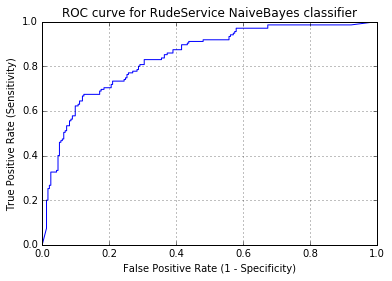

In [39]:
# plot the ROC Curve
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, y_pred_probs_nb)
plt.plot(fpr_nb, tpr_nb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for RudeService NaiveBayes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [40]:
# calculate the AUC for the NaiveBayes model with the default parameters set for CountVectorizer
metrics.roc_auc_score(y_test,y_pred_probs_nb)

0.84196471149260854

In [42]:
# Repeat the process with logistic regression model
#import and instantiate the model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

# fit the training data to the model
logit.fit(X_train_dtm, y_train)

# predict the probabilities that each observation in the test DTM does contain RudeService (ie, is a 1)
y_pred_probs_logit = logit.predict_proba(X_test_dtm)[:,1]
print [round(x,4) for x in y_pred_probs_logit[0:10]]
#inspect the results against the actual values for the first 10 to better understand how performs
[x for x in y_test[0:10]]

[0.6254, 0.1058, 0.7901, 0.0374, 0.4666, 0.8918, 0.0002, 0.0149, 0.2376, 0.1083]


[1, 1, 0, 0, 1, 1, 0, 0, 0, 0]

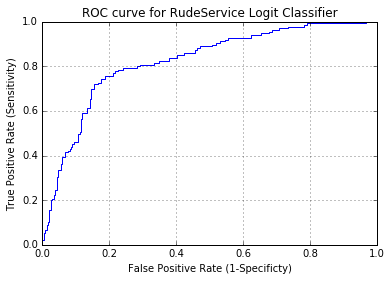

In [43]:
# Plot the ROC curve for the logistic regression model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
fpr_lm, tpr_lm, threshold_lm = metrics.roc_curve(y_test, y_pred_probs_logit)
plt.plot(fpr_lm,tpr_lm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for RudeService Logit Classifier')
plt.xlabel("False Positive Rate (1-Specificty)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

In [44]:
# Calculate the AUC for the Logit Model
metrics.roc_auc_score(y_test, y_pred_probs_logit)

0.82339850580193941

## Task 6

Using either Naive Bayes or logistic regression (whichever one had a better AUC in the previous step), try **tuning CountVectorizer** using some of the techniques we learned in class. Check the testing set **AUC** after each change, and find the set of parameters that increases AUC the most.

- **Hint:** It is highly recommended that you adapt the **`tokenize_test()`** function from class for this purpose, since it will allow you to iterate quickly through different sets of parameters.

In [47]:
# define a function that accepts a vectorizer and calculates the accuracy
# create a param
def tokenize_test(vect):
    result = {}
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    feat = X_train_dtm.shape[1] 
    print 'Features: ', feat

    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_probs_tune = nb.predict_proba(X_test_dtm)[:,1]
    
    # print the accuracy of its predictions
    auc = metrics.roc_auc_score(y_test, y_pred_probs_tune)
    print 'Accuracy: ', auc
    result[feat] = auc
    return result

In [48]:
# first run the tokenize_test funtion with the default parameters
# This shows the same AUC measured above so we know the function is working correctly.
vect = CountVectorizer()
tokenize_test(vect)

Features:  7300
Accuracy:  0.841964711493


{7300: 0.84196471149260854}

### Tuning Parameters to Consider:
1.  Don't convert to lowercase: 

vect = CountVectorizer(lowercase=False)

2. Include 1-grams and 2-grams: 

vect = CountVectorizer(ngram_range=(1,2))

3. Ignore English stop words:
vect = CountVectorizer(stop_words='english')


In [50]:
# Check the AUC for this model that distinguishes lower and upper case
#tokenize_test('lowercase=False')
vect = CountVectorizer(lowercase = False)
tokenize_test(vect)

Features:  8742
Accuracy:  0.840375139088


{8742: 0.84037513908758543}

In [51]:
# Adjust the model to ignore English Stop Words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  7021
Accuracy:  0.853266571292


{7021: 0.85326657129232231}

In [52]:
# Adjust the model to count 1 and 2 grams
vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  57936
Accuracy:  0.818375457002


{57936: 0.81837545700206649}

In [53]:
# Adjust the model to look at max thresholds for tokens that documents can appear in
cieling = range(1,11)
for each in cieling:
    num = float(each)/100
    vect = CountVectorizer(max_df=num)
    tokenize_test(vect)

Features:  6427
Accuracy:  0.736687331108
Features:  6773
Accuracy:  0.773263392148
Features:  6925
Accuracy:  0.767350182801
Features:  7007
Accuracy:  0.78167223017
Features:  7062
Accuracy:  0.801828008266
Features:  7096
Accuracy:  0.802845334605
Features:  7116
Accuracy:  0.811572087109
Features:  7141
Accuracy:  0.834938801462
Features:  7162
Accuracy:  0.841328882531
Features:  7184
Accuracy:  0.840565887776


In [54]:
# Adjust the minimum document frequency
docs = range(2,10)
for doc in docs:
    vect = CountVectorizer(min_df=doc)
    tokenize_test(vect)

Features:  3500
Accuracy:  0.844221904308
Features:  2449
Accuracy:  0.84301382928
Features:  1977
Accuracy:  0.84250516611
Features:  1699
Accuracy:  0.838594817994
Features:  1470
Accuracy:  0.840263869019
Features:  1313
Accuracy:  0.837195994278
Features:  1190
Accuracy:  0.835797170561
Features:  1102
Accuracy:  0.836560165316


In [55]:
# Adjust the maximum number of features to keep
feats = range(1000,7001,1000)
for feat in feats:
    vect = CountVectorizer(max_features=feat)
    tokenize_test(vect)

Features:  1000
Accuracy:  0.830074709903
Features:  2000
Accuracy:  0.840073120331
Features:  3000
Accuracy:  0.842060085837
Features:  4000
Accuracy:  0.84250516611
Features:  5000
Accuracy:  0.840057224607
Features:  6000
Accuracy:  0.838531235098
Features:  7000
Accuracy:  0.840327451915


#### This gives the highest AUC (by only slightly) over the other parameter tuning options

In [56]:
# Try combining some of the better performing tuning parameter options
# remove English stop words, limit the max_features

feats = range(6700,6801,10)
for feat in feats:
    vect = CountVectorizer(stop_words='english', max_features=feat)
    tokenize_test(vect)

Features:  6700
Accuracy:  0.854220314735
Features:  6710
Accuracy:  0.854220314735
Features:  6720
Accuracy:  0.854220314735
Features:  6730
Accuracy:  0.854347480528
Features:  6740
Accuracy:  0.8543951677
Features:  6750
Accuracy:  0.8543951677
Features:  6760
Accuracy:  0.854363376252
Features:  6770
Accuracy:  0.854124940391
Features:  6780
Accuracy:  0.854188523287
Features:  6790
Accuracy:  0.854188523287
Features:  6800
Accuracy:  0.854188523287


In [57]:
# Try combining some of the better performing tuning parameter options
# remove English stop words, limit the max_features, lowercase = False
feats = range(6700,6801,10)
for feat in feats:
    vect = CountVectorizer(stop_words='english', max_features=feat, lowercase=False)
    tokenize_test(vect)

Features:  6700
Accuracy:  0.850723255444
Features:  6710
Accuracy:  0.850723255444
Features:  6720
Accuracy:  0.850723255444
Features:  6730
Accuracy:  0.850373549515
Features:  6740
Accuracy:  0.850373549515
Features:  6750
Accuracy:  0.850373549515
Features:  6760
Accuracy:  0.850341758067
Features:  6770
Accuracy:  0.850309966619
Features:  6780
Accuracy:  0.850309966619
Features:  6790
Accuracy:  0.850341758067
Features:  6800
Accuracy:  0.850087426482


In [58]:
# Try combining some of the better performing tuning parameter options
# remove English stop words, limit the max_features
feats = range(6700,6801,10)
for feat in feats:
    vect = CountVectorizer(stop_words='english', max_features=feat, ngram_range=(1,2))
    tokenize_test(vect)

Features:  6700
Accuracy:  0.843331743761
Features:  6710
Accuracy:  0.843458909553
Features:  6720
Accuracy:  0.84368144969
Features:  6730
Accuracy:  0.843713241138
Features:  6740
Accuracy:  0.843490701001
Features:  6750
Accuracy:  0.84301382928
Features:  6760
Accuracy:  0.843458909553
Features:  6770
Accuracy:  0.843411222381
Features:  6780
Accuracy:  0.843474805277
Features:  6790
Accuracy:  0.843443013829
Features:  6800
Accuracy:  0.843570179622


In [59]:
cieling = range(1,11)
for each in cieling:
    num = float(each)/100
    vect = CountVectorizer(stop_words='english', max_features=6750, max_df=num)
    tokenize_test(vect)

Features:  6339
Accuracy:  0.743284056589
Features:  6666
Accuracy:  0.780384676522
Features:  6750
Accuracy:  0.774153552694
Features:  6750
Accuracy:  0.79046256557
Features:  6750
Accuracy:  0.809092354157
Features:  6750
Accuracy:  0.810936258147
Features:  6750
Accuracy:  0.815609601017
Features:  6750
Accuracy:  0.837561595931
Features:  6750
Accuracy:  0.841996502941
Features:  6750
Accuracy:  0.841964711493


### The set of tuning parameters that increase AUC the most is:
1. Remove english stop words 
2. Set the maximum feature length to  6750 tokens.
    - Number of Features: 6750
    - Highet AUC: 0.8543951677

## Task 7 (Challenge)

The **city** column might be predictive of the response, but we are not currently using it as a feature. Let's see whether we can increase the AUC by adding it to the model:

1. Create a new DataFrame column, **review_city**, that concatenates the **review** text with the **city** text. One easy way to combine string columns in pandas is by using the [`Series.str.cat()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html) method. Make sure to use the **space character** as a separator, as well as replacing **null city values** with a reasonable string value (such as 'na').
2. Redefine X as the **review_city** column, and re-split X and y into training and testing sets.
3. When you run **`tokenize_test()`**, CountVectorizer will simply treat the city as an extra word in the review, and thus it will automatically be included in the model! Check to see whether it increased or decreased the AUC of your **best model**.

In [61]:
# replace null city values with 'na'
city_null = reviews.city.isnull()
reviews.city[city_null] = 'na'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
type(reviews.city) 
reviews['review_city'] = reviews.city.str.cat(reviews.review, sep = ' ')

In [63]:
# check the first few rows
reviews.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1,"Atlanta I'm not a huge mcds lover, but I've be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Atlanta Terrible customer service. ŒæI came in...


In [64]:
# check to make new column is correct
reviews.review_city.sample(5)

1241    Los Angeles The only thing that saved this fas...
4       Atlanta Well, it's McDonald's, so you know wha...
1214    Los Angeles I don't usually review fast food r...
20      Atlanta I had the McCafe Mocha and must say th...
340     Las Vegas I agree with Douglas--this is one of...
Name: review_city, dtype: object

In [65]:
# Create new X feature matrix and y response series
X_city = reviews.review_city
y = reviews.rude

In [70]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    result = {}
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    feat = X_train_dtm.shape[1] 
    print 'Features: ', feat

    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_probs_tune = nb.predict_proba(X_test_dtm)[:,1]
    
    # print the accuracy of its predictions
    auc = metrics.roc_auc_score(y_test, y_pred_probs_tune)
    print 'Accuracy: ', auc
    result[feat] = auc
    return result

In [71]:
# create new train/test split with the city information included
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(1103,)
(368,)
(1103,)
(368,)


In [72]:
# apply new X feature matrix to the tokenize_test function to see impact on AUC 
for each in range(6700, 6801,10):
    vect = CountVectorizer(stop_words='english', max_features=each)
    result = tokenize_test(vect)

Features:  6700
Accuracy:  0.854220314735
Features:  6710
Accuracy:  0.854220314735
Features:  6720
Accuracy:  0.854220314735
Features:  6730
Accuracy:  0.854347480528
Features:  6740
Accuracy:  0.8543951677
Features:  6750
Accuracy:  0.8543951677
Features:  6760
Accuracy:  0.854363376252
Features:  6770
Accuracy:  0.854124940391
Features:  6780
Accuracy:  0.854188523287
Features:  6790
Accuracy:  0.854188523287
Features:  6800
Accuracy:  0.854188523287


### There was no improvement in my best model.  The max AUC is the same before and after the city information is included.

## Task 8 (Challenge)

The **policies_violated:confidence** column may be useful, since it essentially represents a measurement of the training data quality. Let's see whether we can improve the AUC by only training the model using the highest-quality rows!

To accomplish this, your first sub-task is to **calculate the mean confidence score for each row**, and then store those mean scores in a new column. For example, the confidence scores for the first row are `1.0\r\n0.6667\r\n0.6667`, so you should calculate a mean of `0.7778`. Here are the suggested steps:

1. Using the [`Series.str.split()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) method, convert the **policies_violated:confidence** column into lists of one or more "confidence scores". Save the results as a new DataFrame column called **confidence_list**.
2. Define a function that calculates the mean of a list of numbers, and pass that function to the [`Series.apply()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) method of the **confidence_list** column. That will calculate the mean confidence score for each row. Save those scores in a new DataFrame column called **confidence_mean**.
    - **Hint:** This [code snippet](http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) may help you to understand the `Series.apply()` method.

In [73]:
# convert the polices_violated:confidence column into lists of one or more "confidence scores" which is the aversge
# of each row.
# Use the Series.str.split() method
reviews['confidence_list'] = reviews['policies_violated:confidence'].str.split()
print reviews.shape
#print reviews.head(3)
#reviews.describe()

(1471, 14)


In [74]:
reviews.confidence_list[0]

['1.0', '0.6667', '0.6667']

In [75]:
# Define a function that calculates the mean of a list of numbers
def list_average(some_list):
    to_floats = [float(x) for x in some_list]
    average = (sum(to_floats))/len(to_floats)
    return average

In [76]:
# Calculate the average of the 'confidence_list' column of the reviews DF usgin the Series.apply() method
reviews['confidence_mean'] = reviews.confidence_list.apply(list_average)
reviews.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list,confidence_mean
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1,"Atlanta I'm not a huge mcds lover, but I've be...","[1.0, 0.6667, 0.6667]",0.7778
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Atlanta Terrible customer service. ŒæI came in...,[1],1.0000
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0,"Atlanta First they ""lost"" my order, actually t...","[1.0, 1.0]",1.0000
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN,0,Atlanta I see I'm not the only one giving 1 st...,[0.6667],0.6667
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1,"Atlanta Well, it's McDonald's, so you know wha...",[1],1.0000


Your second sub-task is to **create a new DataFrame with only the highest-quality rows**, meaning those with a mean score of 1, and then repeat the model building and evaluation process with the new DataFrame. Here are the suggested steps:

1. Create a new DataFrame that only includes the rows with a **confidence_mean** of 1. Compare the shapes of the original and new DataFrames.
2. Redefine X and y using the new DataFrame, and re-split X and y into training and testing sets.
3. Check to see whether this process increased or decreased the AUC of your **best model**.
4. Try **re-tuning** CountVectorizer to maximize the AUC, to see if this strategy was worthwhile.

In [77]:
# identify those rows that cotain confidence_mean values equal to 1
quality_rows = reviews['confidence_mean'] == 1
# Use the sum function to see how many TRUE responses there are for comparison later with new DF
# look at first 5 and comapre with DF head as a quick check that it worked correctly
print sum(quality_rows)
quality_rows[0:5]

785


0    False
1     True
2     True
3    False
4     True
Name: confidence_mean, dtype: bool

In [78]:
# create new DF with only the quality rows
reviews_quality = reviews[quality_rows]
# verify the shape to make sure there are the same number of rows as there are TRUE values in quality_rows
print reviews_quality.shape[0]
print sum(quality_rows)
# Look at first few rows of the new DF as a check
reviews_quality.head()

785
785


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list,confidence_mean
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Atlanta Terrible customer service. ŒæI came in...,[1],1.0
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0,"Atlanta First they ""lost"" my order, actually t...","[1.0, 1.0]",1.0
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1,"Atlanta Well, it's McDonald's, so you know wha...",[1],1.0
9,679455662,False,finalized,3,2/21/15 0:12,na,1,Atlanta,NaN,This McDonald's has gotten much better. Usuall...,NaN,0,Atlanta This McDonald's has gotten much better...,[1],1.0
10,679455663,False,finalized,3,2/21/15 0:38,SlowService,1,Atlanta,NaN,Let's start here only reason I came into McDon...,NaN,0,Atlanta Let's start here only reason I came in...,[1],1.0


In [79]:
# Create new X feature matrix and y response series for use in train/test split and DTM creation
X = reviews_quality.review_city
y = reviews_quality.rude
print X.shape
print y.shape

(785,)
(785,)


In [80]:
# create new train/test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =1)
# check the shapes
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(588,)
(197,)
(588,)
(197,)


In [81]:
# create new DTMs for use in assessing impact on AUC of highest scoring model so far using best model
vect = CountVectorizer(stop_words='english', max_features=6750)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<588x4632 sparse matrix of type '<type 'numpy.int64'>'
	with 20369 stored elements in Compressed Sparse Row format>

In [82]:
# create X_test_DTM
X_test_dtm = vect.transform(X_test)
X_test_dtm

<197x4632 sparse matrix of type '<type 'numpy.int64'>'
	with 5549 stored elements in Compressed Sparse Row format>

In [83]:
# Comparison best model performance looking only at "quality data"
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
# determine probablities that test reviews are scored a 1, ie containing RudeService
y_pred_probs_quality = nb.predict_proba(X_test_dtm)[:,1]
metrics.roc_auc_score(y_test, y_pred_probs_quality)

0.84641284641284642

### Grabbing only those rows with the confidence quality means equat to 1 did NOT increase AUC.  
- This may be due to the fact that there are 50% fewer rows in the newer set.  

### Part 3 - Perform parameter tuning with the new DF to see if AUC can be increased
- check how new DF peforms with CounteVectorizer defaults set for creating the DTMs
- remove stop-words and/or frequent terms
- limit max_features
- set max and min document frequency requirements
- set the n_gram range
- try combos of the above

In [85]:
# Check the perfomance of the CountVectorizer defaults
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [86]:
#check the dims
X_train_dtm

<588x4895 sparse matrix of type '<type 'numpy.int64'>'
	with 35041 stored elements in Compressed Sparse Row format>

In [87]:
# check the dims
X_test_dtm

<197x4895 sparse matrix of type '<type 'numpy.int64'>'
	with 10228 stored elements in Compressed Sparse Row format>

In [88]:
# create new nb model with updated vect
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
# determine probablity the new model assigns a value of 1 to a given review
y_pred_probs_quality = nb.predict_proba(X_test_dtm)[:,1]
y_pred_probs_quality[0:5]

array([  2.65508413e-02,   2.88531571e-01,   1.10810175e-05,
         9.28123152e-07,   3.12025046e-11])

In [90]:
# determine the AUC for the higher quality dataframe  using the default vect parameters
# Notice this is an imporvement on the AUC of 0.84196471149260854 for the original entire DF
metrics.roc_auc_score(y_test, y_pred_probs_quality)

0.8534058534058534

In [91]:
# set vect lowercase to False
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [92]:
nb.fit(X_train_dtm, y_train)
y_pred_probs_quality = nb.predict_proba(X_test_dtm)[:,1]
metrics.roc_auc_score(y_test,y_pred_probs_quality)

0.84751359751359756

In [93]:
# Now try by setting the n_gram values
vect = CountVectorizer(ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [94]:
# This results in a lower AUC
nb.fit(X_train_dtm, y_train)
y_pred_probs_quality = nb.predict_proba(X_test_dtm)[:,1]
metrics.roc_auc_score(y_test,y_pred_probs_quality)

0.79351204351204352

In [95]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    result = {}
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    feat = X_train_dtm.shape[1] 
    print 'Features: ', feat

    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_probs_tune = nb.predict_proba(X_test_dtm)[:,1]
    
    # print the accuracy of its predictions
    auc = metrics.roc_auc_score(y_test, y_pred_probs_tune)
    print 'Accuracy: ', auc
    result[feat] = auc
    return result

In [96]:
# Look at limiting the number of features
features = range(600,701,10)
for feature in features:
    vect = CountVectorizer(max_features=feature)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    print "Features:", feature
    nb.fit(X_train_dtm, y_train)
    y_pred_probs = nb.predict_proba(X_test_dtm)[:,1]
    print "AUC:", metrics.roc_auc_score(y_test,y_pred_probs)
    print

Features: 600
AUC: 0.885716135716

Features: 610
AUC: 0.88986013986

Features: 620
AUC: 0.885586635587

Features: 630
AUC: 0.878334628335

Features: 640
AUC: 0.87691012691

Features: 650
AUC: 0.877946127946

Features: 660
AUC: 0.878075628076

Features: 670
AUC: 0.870953120953

Features: 680
AUC: 0.869528619529

Features: 690
AUC: 0.864737114737

Features: 700
AUC: 0.863571613572



In [97]:
# limit the max document frequency
df_range = [x/10. for x in range(1,10,1)]
for df in df_range:
    print df
    vect = CountVectorizer(max_df = df)
    tokenize_test(vect)

0.1
Features:  4786
Accuracy:  0.821030821031
0.2
Features:  4846
Accuracy:  0.836635586636
0.3
Features:  4873
Accuracy:  0.85224035224
0.4
Features:  4881
Accuracy:  0.855477855478
0.5
Features:  4886
Accuracy:  0.855089355089
0.6
Features:  4892
Accuracy:  0.853276353276
0.7
Features:  4892
Accuracy:  0.853276353276
0.8
Features:  4894
Accuracy:  0.853988603989
0.9
Features:  4895
Accuracy:  0.853405853406


In [99]:
# limit the min document frequence
df_range = [x for x in range(1,10,1)]
for df in df_range:
    print df
    vect = CountVectorizer(min_df = df)
    tokenize_test(vect)

1
Features:  4895
Accuracy:  0.853405853406
2
Features:  2233
Accuracy:  0.857938357938
3
Features:  1559
Accuracy:  0.872053872054
4
Features:  1242
Accuracy:  0.867845117845
5
Features:  1032
Accuracy:  0.861693861694
6
Features:  902
Accuracy:  0.863053613054
7
Features:  818
Accuracy:  0.868881118881
8
Features:  721
Accuracy:  0.864866614867
9
Features:  653
Accuracy:  0.882996632997


#### Using only those rows that have a confidence_mean of 1 for the quaility of the observation, did not improve the overall performance of my previous model.  However, using this higher quality data and limiting the number of features to around 600-610 did produce a more accurate model with an AUC of 88.98%, compared to the previous best performing model which obtained a max AUC of 85.4%.

## Task 9 (Challenge)

New comments have been submitted to the McDonald's website, and you need to **score them with the likelihood** that they are referring to rude service.

1. Before making predictions on out-of-sample data, it is important to re-train your model on all relevant data using the tuning parameters and preprocessing steps that produced the best AUC above.
    - In other words, X should be defined using either **all rows** or **only those rows with a confidence_mean of 1**, whichever produced a better AUC above.
    - X should refer to either the **review column** or the **review_city column**, whichever produced a better AUC above.
    - CountVectorizer should be instantiated with the **tuning parameters** that produced the best AUC above.
    - **`train_test_split()`** should not be used during this process.
2. Build a document-term matrix (from X) called **X_dtm**, and examine its shape.
3. Read the new comments stored in **`mcdonalds_new.csv`** into a DataFrame called **new_comments**, and examine it.
4. If your model uses a **review_city** column, create that column in the new_comments DataFrame. (Otherwise, skip this step.)
5. Build a document_term matrix (from the **new_comments** DataFrame) called **new_dtm**, and examine its shape.
6. Train your best model (Naive Bayes or logistic regression) using **X_dtm** and **y**.
7. Predict the "rude probability" for each comment in **new_dtm**, and store the probabilities in an object called **new_pred_prob**.
8. Print the **full text** for each new comment alongside its **"rude probability"**. (You may need to [increase the max_colwidth](http://pandas.pydata.org/pandas-docs/stable/options.html) to see the full text.) Examine the results, and comment on how well you think the model performed!

### Re-train the model on all the relevant data with the tuning parameters explored above:
1. Use only those rows that contain confidence_mean of 1 (ie, use DF reviews_quality
2. Use the NaiveBayes classification model
3. Set the max_features in the CountVectorizer to 610 #should this be upped to a proportion of the terms rather than a fixed number?
4. There was no difference in the max AUC achieved with and without city info included, so leave in to see if it does have an impact with more observations taken into consideration

In [211]:
# Review the reviews_quality DF
print reviews_quality.shape
reviews_quality.head(3)

(785, 15)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list,confidence_mean
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Atlanta Terrible customer service. ŒæI came in...,[1],1.0
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0,"Atlanta First they ""lost"" my order, actually t...","[1.0, 1.0]",1.0
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1,"Atlanta Well, it's McDonald's, so you know wha...",[1],1.0


In [123]:
# set the X feature matrix equal to the reviews only with confidence_mean of 1 with the city info included
X = reviews_quality

In [124]:
# instantiate CountVectorizer and set optimal tuning parameters based on evaluation of AUC above
# for this model that is to remove english stop_words and to limit the max features to 610
vect = CountVectorizer(stop_words='english', max_features=610)

In [125]:
# build the DTM from X
X_dtm = vect.fit_transform(X.review_city)

In [126]:
# load in the OOS mcdonalds comments into a new DF and examine it
new_comments = pd.read_csv('../data/mcdonalds_new.csv')
new_comments.head()

,city,review
0,Las Vegas,Went through the drive through and ordered a #...
1,Chicago,Phenomenal experience. Efficient and friendly ...
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...
3,New York,Close to my workplace. It was well manged befo...
4,Portland,I've made at least 3 visits to this particular...


In [127]:
# look at last few rows
new_comments.tail()

,city,review
5,Houston,Why did I revisited this McDonald's again. I...
6,Atlanta,This specific McDonald's is the bar I hold all...
7,Dallas,My friend and I stopped in to get a late night...
8,Cleveland,Friendly people but completely unable to deliv...
9,NaN,"Having visited many McDonald's over the years,..."


In [128]:
# create a review_cities column in the new DF
# replace null values for city
null_rows = new_comments.city.isnull()
print null_rows

# replace null values with na
new_comments.city[null_rows] = 'na'
new_comments.tail

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: city, dtype: bool


<bound method DataFrame.tail of           city                                             review
0    Las Vegas  Went through the drive through and ordered a #...
1      Chicago  Phenomenal experience. Efficient and friendly ...
2  Los Angeles  Ghetto lady helped me at the drive thru. Very ...
3     New York  Close to my workplace. It was well manged befo...
4     Portland  I've made at least 3 visits to this particular...
5      Houston  Why did I revisited this McDonald's  again.  I...
6      Atlanta  This specific McDonald's is the bar I hold all...
7       Dallas  My friend and I stopped in to get a late night...
8    Cleveland  Friendly people but completely unable to deliv...
9           na  Having visited many McDonald's over the years,...>

In [129]:
# combine the review and cities columns
new_comments['review_city'] = new_comments.city.str.cat(new_comments.review, sep = ' ')
# review to make sure it worked
new_comments

,city,review,review_city
0,Las Vegas,Went through the drive through and ordered a #...,Las Vegas Went through the drive through and o...
1,Chicago,Phenomenal experience. Efficient and friendly ...,Chicago Phenomenal experience. Efficient and f...
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...,Los Angeles Ghetto lady helped me at the drive...
3,New York,Close to my workplace. It was well manged befo...,New York Close to my workplace. It was well ma...
4,Portland,I've made at least 3 visits to this particular...,Portland I've made at least 3 visits to this p...
5,Houston,Why did I revisited this McDonald's again. I...,Houston Why did I revisited this McDonald's a...
6,Atlanta,This specific McDonald's is the bar I hold all...,Atlanta This specific McDonald's is the bar I ...
7,Dallas,My friend and I stopped in to get a late night...,Dallas My friend and I stopped in to get a lat...
8,Cleveland,Friendly people but completely unable to deliv...,Cleveland Friendly people but completely unabl...
9,na,"Having visited many McDonald's over the years,...",na Having visited many McDonald's over the yea...


In [130]:
# build a DTM from the new_comments feature matrix column review_city
new_dtm = vect.transform(new_comments.review_city)
new_dtm

<10x610 sparse matrix of type '<type 'numpy.int64'>'
	with 195 stored elements in Compressed Sparse Row format>

In [131]:
# train my NB model with the X_dtm and y values from the original reviews DF
y = X.rude
nb = MultinomialNB()
nb.fit(X_dtm, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
# predicted probabilities for "rude service" in the new_comments dataframe
new_pred_prob = nb.predict_proba(new_dtm)[:,1]
new_pred_prob[0:5]

array([ 0.69239795,  0.01786883,  0.92511411,  0.01721592,  0.27058284])

In [137]:
# print the predicted probability of each entry alongside the comments full text to see how model performed
# add a column to the new_comments DF to store the results
new_comments['rude'] = new_pred_prob
new_comments

,city,review,review_city,rude
0,Las Vegas,Went through the drive through and ordered a #...,Las Vegas Went through the drive through and o...,0.692398
1,Chicago,Phenomenal experience. Efficient and friendly ...,Chicago Phenomenal experience. Efficient and f...,0.017869
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...,Los Angeles Ghetto lady helped me at the drive...,0.925114
3,New York,Close to my workplace. It was well manged befo...,New York Close to my workplace. It was well ma...,0.017216
4,Portland,I've made at least 3 visits to this particular...,Portland I've made at least 3 visits to this p...,0.270583
5,Houston,Why did I revisited this McDonald's again. I...,Houston Why did I revisited this McDonald's a...,0.036755
6,Atlanta,This specific McDonald's is the bar I hold all...,Atlanta This specific McDonald's is the bar I ...,0.276451
7,Dallas,My friend and I stopped in to get a late night...,Dallas My friend and I stopped in to get a lat...,0.999844
8,Cleveland,Friendly people but completely unable to deliv...,Cleveland Friendly people but completely unabl...,0.122486
9,na,"Having visited many McDonald's over the years,...",na Having visited many McDonald's over the yea...,0.052421


In [178]:
# set the max_col width wide enough to view the entire comments for each row
pd.set_option('max_colwidth',1000)

In [ ]:
# print the wider DF
new_comments

In [179]:
# add my personal score of 0 or 1 for Rude Service to check performance
new_comments.my_rude = [1,0,1,0,1,0,0,1,0,0]

In [180]:
# compare predicated probabilites for rude service with the actual 
new_comments

,city,review,review_city,rude,my_rude
0,Las Vegas,"Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed.","Las Vegas Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed.",0.692398,1
1,Chicago,"Phenomenal experience. Efficient and friendly staff. Clean restrooms, good, fast service and bilingual staff. One of the best restaurants in the chain.","Chicago Phenomenal experience. Efficient and friendly staff. Clean restrooms, good, fast service and bilingual staff. One of the best restaurants in the chain.",0.017869,0
2,Los Angeles,Ghetto lady helped me at the drive thru. Very rude and disrespectful to the co workers. Never coming back. Yuck!,Los Angeles Ghetto lady helped me at the drive thru. Very rude and disrespectful to the co workers. Never coming back. Yuck!,0.925114,1
3,New York,"Close to my workplace. It was well manged before. Now it's OK. The parking can be tight sometimes. Like all McDonald's, prices are getting expensive.","New York Close to my workplace. It was well manged before. Now it's OK. The parking can be tight sometimes. Like all McDonald's, prices are getting expensive.",0.017216,0
4,Portland,"I've made at least 3 visits to this particular location just because it's right next to my office building.. and all my experience have been consistently bad. There are a few helpers taking your orders throughout the drive-thru route and they are the worst. They rush you in placing an order and gets impatient once the order gets a tad bit complicated. Don't even bother changing your mind oh NO! They will glare at you and snap at you if you want to change something. I understand its FAST food, but I want my order placed right. Not going back if I can help it.","Portland I've made at least 3 visits to this particular location just because it's right next to my office building.. and all my experience have been consistently bad. There are a few helpers taking your orders throughout the drive-thru route and they are the worst. They rush you in placing an order and gets impatient once the order gets a tad bit complicated. Don't even bother changing your mind oh NO! They will glare at you and snap at you if you want to change something. I understand its FAST food, but 

### Personal Assessment of model performance
Overall I am believe the model performed quite well.  After personally inspecting each of the 10 OOS comments, I detemined the model correctly labeled 9 out of 10, providing a roughly 90% TPR and only scoring 4 of the 10 as Rude Service.  The one incorrectly labeled comment does refer to RudeService but it appears to be a review that is also referring to "OrderProblems" which appears to have confused the model in this case.

It is a fairly small OOS sample but I believe the overall perforance does bode well for wider application of the model.  I was particularlly impressed that the model was able to detect the subtetly between different types of negative reviews as well.  For example, row 5 is clearly a negative review, however, it is referring to a separate category of "Filthy" and has nothing to do with "RudeService".  The model quite rightly showed this too, scoring this particular comment as a only 3.6% likelihood of referring to RudeService despite being quite a negative review overall.  Similarly, for row 8, the comments are mixed with "positive" friendly service comments but with "negative" comments about "OrderProblem" issues.  Again, the model was able to discern between these two and only scored this entry as having a 12% likelihood of referring to "RudeService."